### **Analyze Sales data to improve customer experience and sales**

In [20]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("Sales_Data_Dataset.csv", encoding="unicode_escape")

### 1. Raw Data

In [21]:
df.shape #Showing 11251 rows and 15 columns

(11251, 15)

In [15]:
df

User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       Occupation Product_Category  Orders  \
0         Maharashtra   Western       Healthcare             Auto       1   
1      Andhra Pradesh  Southern             Govt             Auto       3   
2       Uttar Pradesh   Central       Automobile             Auto       3   
3           Karnataka  Southern     Construction             Auto       2   
4             Gujarat   Western  Food Processing             Auto       2   
...               ...       ...              ...              ...     ...   
11246     Maharashtra   Western         Chemical           Office       4   
11247         Haryana  Northern       Healthcare       Veterinary       3   
11248  Madhya Pradesh   Central          Textile           Office       4   
11249       Karnataka  Southern      Agriculture           Office       3   
11250     Maharashtra   Western       Healthcare           Office       3   

        Amount  Status  unnamed1  
0      23952.0     NaN       NaN  
1      23934.0     NaN       NaN  
2      23924.0     NaN       NaN  
3      23912.0     NaN       NaN  
4      23877.0     NaN       NaN  
...        ...     ...       ...  
11246    370.0     NaN       NaN  
11247    367.0     NaN       NaN  
11248    213.0     NaN       NaN  
11249    206.0     NaN       NaN  
11250    188.0     NaN       NaN  

[11251 rows x 15 columns]

In [22]:
df.head(10) # Display limited 10 rows data

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   
5  1000588       Joni  P00057942      M     26-35   28               1   
6  1001132       Balk  P00018042      F     18-25   25               1   
7  1002092   Shivangi  P00273442      F       55+   61               0   
8  1003224     Kushal  P00205642      M     26-35   35               0   
9  1003650      Ginny  P00031142      F     26-35   26               1   

              State      Zone       Occupation Product_Category  Orders  \
0       Maharashtra   Western       Healthcare             Auto       1   
1    Andhra Pradesh  Southern             Govt             Auto       3   
2     Uttar Pradesh   Central       Automobile             Auto       3   
3         Karnataka  Southern     Construction             Auto       2   
4           Gujarat   Western  Food Processing             Auto       2   
5  Himachal Pradesh  Northern  Food Processing             Auto       1   
6     Uttar Pradesh   Central           Lawyer             Auto       4   
7       Maharashtra   Western        IT Sector             Auto       1   
8     Uttar Pradesh   Central             Govt             Auto       2   
9    Andhra Pradesh  Southern            Media             Auto       4   

     Amount  Status  unnamed1  
0  23952.00     NaN       NaN  
1  23934.00     NaN       NaN  
2  23924.00     NaN       NaN  
3  23912.00     NaN       NaN  
4  23877.00     NaN       NaN  
5  23877.00     NaN       NaN  
6  23841.00     NaN       NaN  
7       NaN     NaN       NaN  
8  23809.00     NaN       NaN  
9  23799.99     NaN       NaN

### 2. Data Cleansing

**All Column Information**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


##### *observe that Status and unnamed1 column is blank so we should drop these columns*

In [29]:
df.drop(['Status','unnamed1'], axis=1, inplace=True) 
# inplace=True will ensure the operation happens in the same df variable instead of assigning it to new variable(new dataframe)
# axis=1 means drop the whole vertical row or column

In [25]:
df.head() #head by default displays 5 rows

User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders   Amount  
0     Maharashtra   Western       Healthcare             Auto       1  23952.0  
1  Andhra Pradesh  Southern             Govt             Auto       3  23934.0  
2   Uttar Pradesh   Central       Automobile             Auto       3  23924.0  
3       Karnataka  Southern     Construction             Auto       2  23912.0  
4         Gujarat   Western  Food Processing             Auto       2  23877.0

##### *observe that Status and unnamed1 column are dropped in the above data*

##### *Check the null values in the dataframe as below*

In [34]:
pd.isnull(df) #This will replace all the value in Dataframe as True or False based on the null values

User_ID  Cust_name  Product_ID  Gender  Age Group    Age  \
0        False      False       False   False      False  False   
1        False      False       False   False      False  False   
2        False      False       False   False      False  False   
3        False      False       False   False      False  False   
4        False      False       False   False      False  False   
...        ...        ...         ...     ...        ...    ...   
11246    False      False       False   False      False  False   
11247    False      False       False   False      False  False   
11248    False      False       False   False      False  False   
11249    False      False       False   False      False  False   
11250    False      False       False   False      False  False   

       Marital_Status  State   Zone  Occupation  Product_Category  Orders  \
0               False  False  False       False             False   False   
1               False  False  False       False             False   False   
2               False  False  False       False             False   False   
3               False  False  False       False             False   False   
4               False  False  False       False             False   False   
...               ...    ...    ...         ...               ...     ...   
11246           False  False  False       False             False   False   
11247           False  False  False       False             False   False   
11248           False  False  False       False             False   False   
11249           False  False  False       False             False   False   
11250           False  False  False       False             False   False   

       Amount  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
11246   False  
11247   False  
11248   False  
11249   False  
11250   False  

[11251 rows x 13 columns]

In [31]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

##### *Note that Amount column has 12 null values as shown above, so we should drop those rows*

In [35]:
df.shape

(11251, 13)

In [36]:
df.dropna(inplace=True) # Dropping all ros in which any column value is null

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [38]:
df.shape

(11239, 13)

##### *Observe that all the columns having same number of non null values as above*

##### *We want to change the datatype for the Amount column from float to whole integer number*

In [42]:
df['Amount'] = df['Amount'].astype('int64')

In [43]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object

In [ ]:
##### *Note that the Amount column is converted from float to integer now*

##### *We want to rename the column Marrital_status to Is_Married*

In [44]:
df.rename(columns={'Marital_Status':'Is_Married'}, inplace=True)

In [45]:
df.head()

User_ID  Cust_name Product_ID Gender Age Group  Age  Is_Married  \
0  1002903  Sanskriti  P00125942      F     26-35   28           0   
1  1000732     Kartik  P00110942      F     26-35   35           1   
2  1001990      Bindu  P00118542      F     26-35   35           1   
3  1001425     Sudevi  P00237842      M      0-17   16           0   
4  1000588       Joni  P00057942      M     26-35   28           1   

            State      Zone       Occupation Product_Category  Orders  Amount  
0     Maharashtra   Western       Healthcare             Auto       1   23952  
1  Andhra Pradesh  Southern             Govt             Auto       3   23934  
2   Uttar Pradesh   Central       Automobile             Auto       3   23924  
3       Karnataka  Southern     Construction             Auto       2   23912  
4         Gujarat   Western  Food Processing             Auto       2   23877

##### *Note that the Marrital_status column is renamed to Is_Married as shown above*

In [47]:
# If we want to see the specific functions on the dataframe numeric data. Use describe
df.describe()

User_ID           Age    Is_Married        Orders        Amount
count  1.123900e+04  11239.000000  11239.000000  11239.000000  11239.000000
mean   1.003004e+06     35.410357      0.420055      2.489634   9453.610553
std    1.716039e+03     12.753866      0.493589      1.114967   5222.355168
min    1.000001e+06     12.000000      0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000      0.000000      2.000000   5443.000000
50%    1.003064e+06     33.000000      0.000000      2.000000   8109.000000
75%    1.004426e+06     43.000000      1.000000      3.000000  12675.000000
max    1.006040e+06     92.000000      1.000000      4.000000  23952.000000

In [57]:
# For specific columns
df[['Age','Orders','Amount']].describe()

Age        Orders        Amount
count  11239.000000  11239.000000  11239.000000
mean      35.410357      2.489634   9453.610553
std       12.753866      1.114967   5222.355168
min       12.000000      1.000000    188.000000
25%       27.000000      2.000000   5443.000000
50%       33.000000      2.000000   8109.000000
75%       43.000000      3.000000  12675.000000
max       92.000000      4.000000  23952.000000

### 3. EDA (Exploratory Data Analysis)

##### *We will do the exploratory analysis using different columns*

In [58]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Is_Married', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

#### i. Analysis on the basis of Gender

##### *Lets try to find which gender customer are more in number*

<Axes: xlabel='Gender', ylabel='count'>

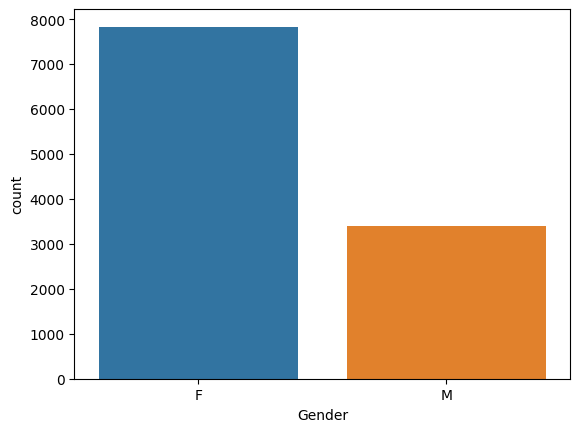

In [59]:
sb.countplot(x='Gender', data=df) # This will gives us a simple chart showing customers on the basis of gender. 
#But we are not getting the count label here.

Rectangle(xy=(-0.4, 0), width=0.8, height=7832, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=3407, angle=0)


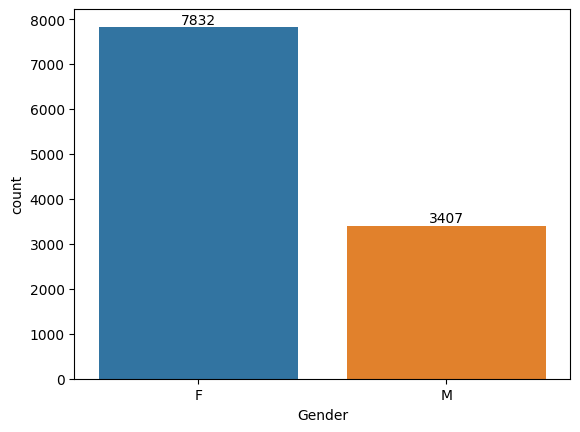

In [68]:
cnt_plot = sb.countplot(x='Gender', data=df) #In countplot Y axis is the count itself. Hence only need to supply X axis.

for bars in cnt_plot.containers: #containers gives us bars details from the chart
    print(bars[0]) #1st bar value including number of female customer (7832)
    print(bars[1]) #2nd bar value including number of male customer (3407)
    cnt_plot.bar_label(bars)

##### *Lets try to find which gender customer have spent more money or having more purchasing power*

In [87]:
val = df.groupby(by='Gender', as_index=False)['Amount'].sum() 
#If we want output to be like Dataframe use as_index=False. It will give SQL table like output
#If we want output to be like Series then use as_index=True.

In [88]:
val #This will give amount spent group by Gender

Gender    Amount
0      F  74335853
1      M  31913276

In [92]:
val = df.groupby(by='Gender', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [93]:
val

Gender    Amount
0      F  74335853
1      M  31913276

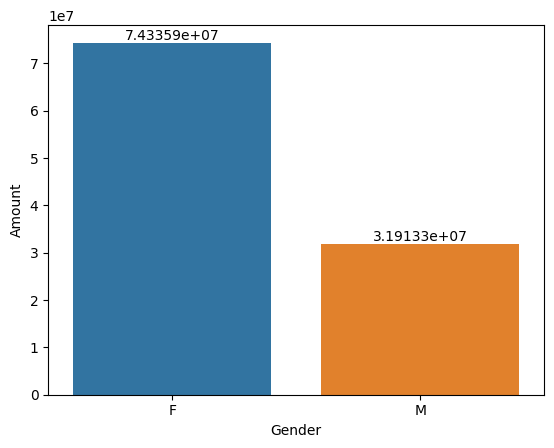

In [95]:
bar_plot = sb.barplot(x='Gender', y='Amount', data=val)

for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### *Conclusion: From the above analysis on Gender. Its clear that female buyers are more than male and female buyers having more purchasing power*

#### ii. Analysis on the basis of Age Group

In [98]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Is_Married', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='Age Group', ylabel='count'>

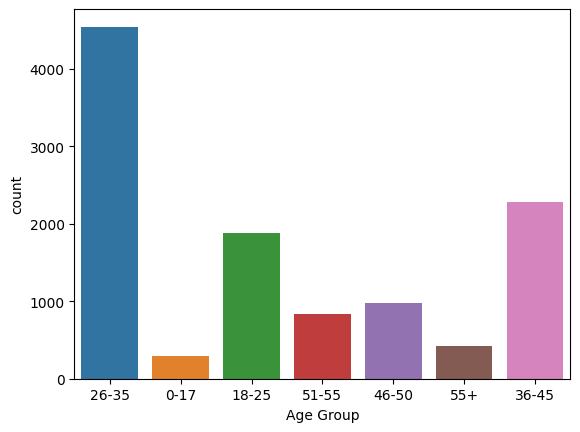

In [100]:
sb.countplot(x='Age Group', data=df) #It will show customer categories based on Age Group.
#But male and female not categorized. For this we need to pass value in hue parameter so that it can
#distinguished customer categories in age group with Gender also.

<Axes: xlabel='Age Group', ylabel='count'>

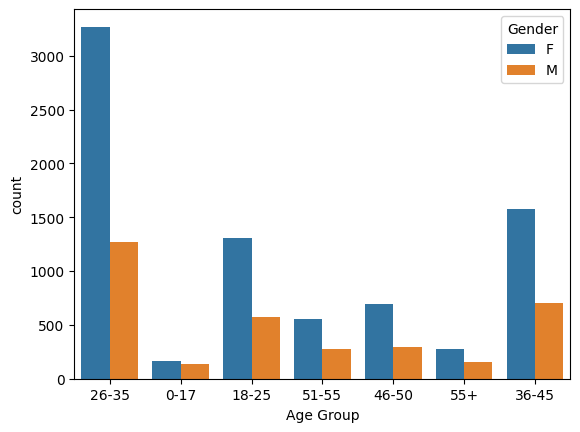

In [102]:
sb.countplot(x='Age Group', data=df, hue='Gender') # Noe Age group customer categories showing along with Gender
#Note that Gender legend is showing in the upper right corner.

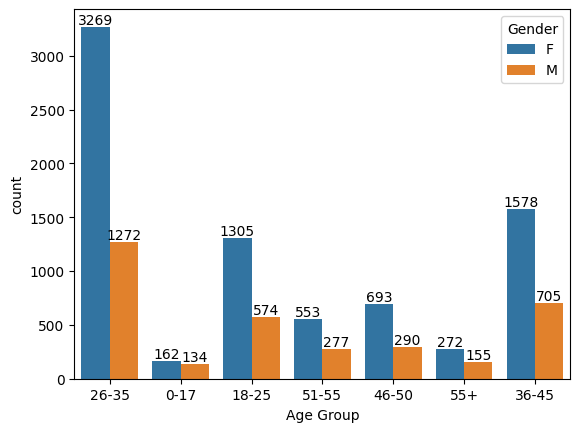

In [103]:
cnt_plot = sb.countplot(x='Age Group', data=df, hue='Gender') #Lets put value labels on bars
for bars in cnt_plot.containers:
    cnt_plot.bar_label(bars)

##### *Note that above graph showing how many male and female buyers from which age groups are involved in the purchases*

In [104]:
df.groupby(by='Age Group', as_index=False)['Amount'].sum()

Age Group    Amount
0      0-17   2699653
1     18-25  17240732
2     26-35  42613442
3     36-45  22144994
4     46-50   9207844
5     51-55   8261477
6       55+   4080987

In [105]:
val = df.groupby(by='Age Group', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

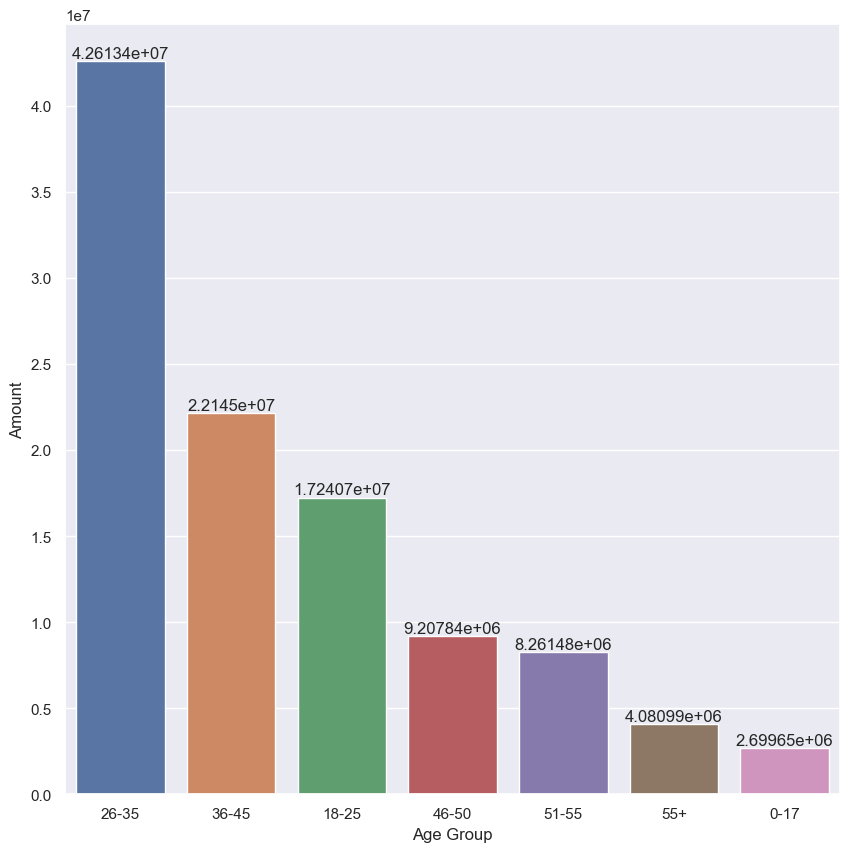

In [117]:
bar_plot = sb.barplot(x='Age Group', y='Amount', data=val)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### *Note that some values overlaps in the above graph so we should set size for bars*

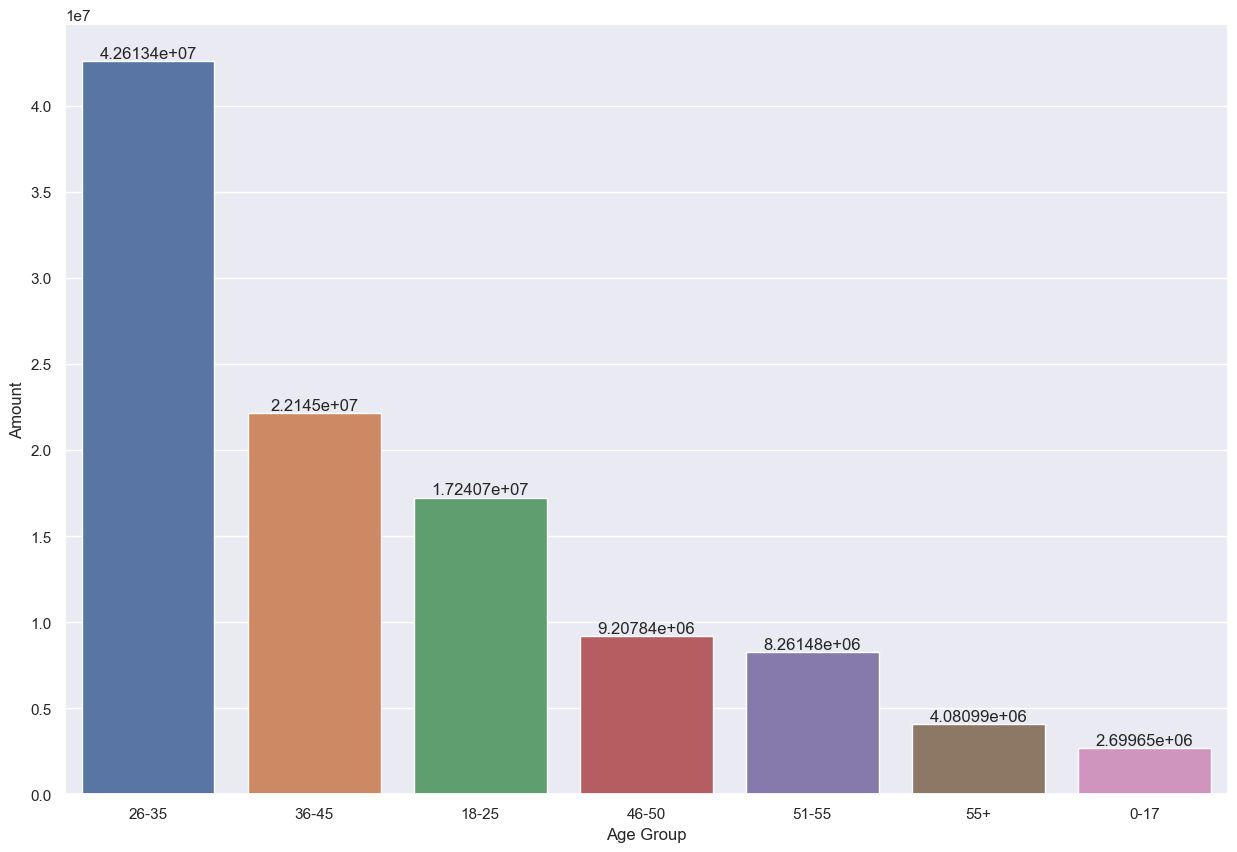

In [113]:
bar_plot = sb.barplot(x='Age Group', y='Amount', data=val)
sb.set(rc={"figure.figsize":(10,10)})
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### *Note that now all values on bar are clearly visible*

##### *Also from the above graph its clear that most of the buyers belongs to 26-35 Age group*

#### iii. Analysis on the basis of State

In [118]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Is_Married', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

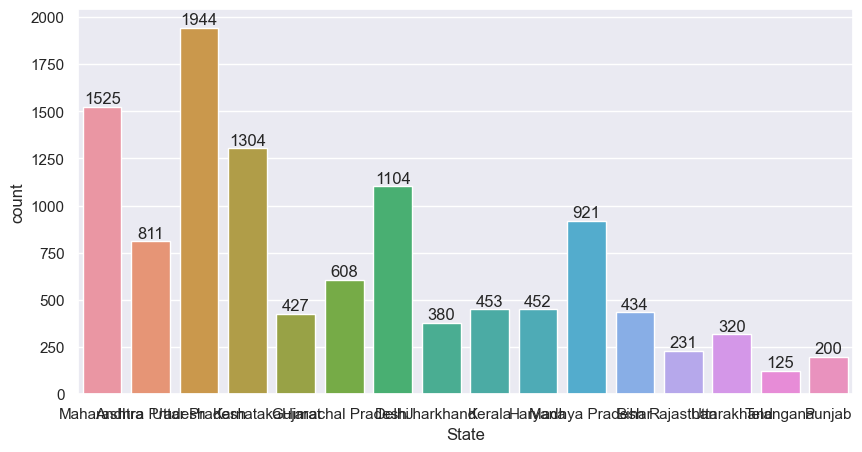

In [133]:
cnt_plot = sb.countplot(x='State', data=df)
for bars in cnt_plot.containers:
    cnt_plot.bar_label(bars)

In [136]:
df.groupby(by='State', as_index=False)['Orders'].sum() #Orders from each state

State  Orders
0     Andhra Pradesh    2051
1              Bihar    1062
2              Delhi    2740
3            Gujarat    1066
4            Haryana    1109
5   Himachal Pradesh    1568
6          Jharkhand     953
7          Karnataka    3240
8             Kerala    1137
9     Madhya Pradesh    2252
10       Maharashtra    3810
11            Punjab     495
12         Rajasthan     555
13         Telangana     312
14     Uttar Pradesh    4807
15       Uttarakhand     824

In [137]:
df.groupby(by='State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False) #Orders sorted by each state

State  Orders
14     Uttar Pradesh    4807
10       Maharashtra    3810
7          Karnataka    3240
2              Delhi    2740
9     Madhya Pradesh    2252
0     Andhra Pradesh    2051
5   Himachal Pradesh    1568
8             Kerala    1137
4            Haryana    1109
3            Gujarat    1066
1              Bihar    1062
6          Jharkhand     953
15       Uttarakhand     824
12         Rajasthan     555
11            Punjab     495
13         Telangana     312

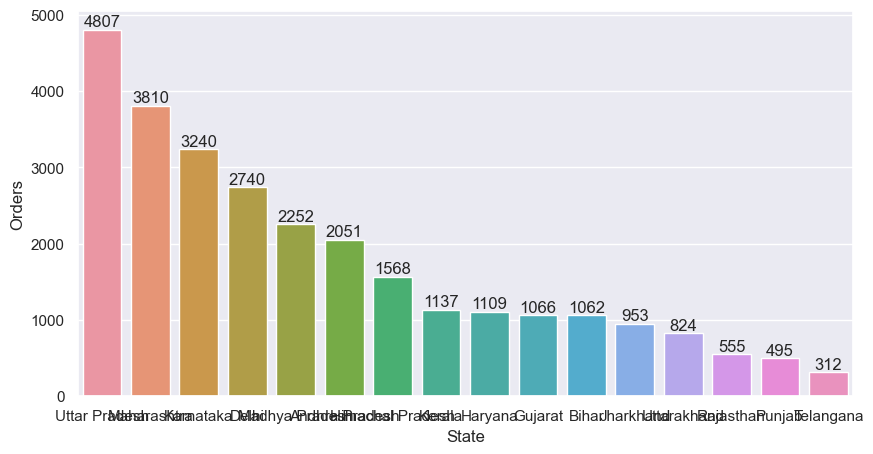

In [139]:
val=df.groupby(by='State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
bar_plot = sb.barplot(x='State', y='Orders', data=val)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars) #Here showing all the state. Lets check top 5 states in the next step.

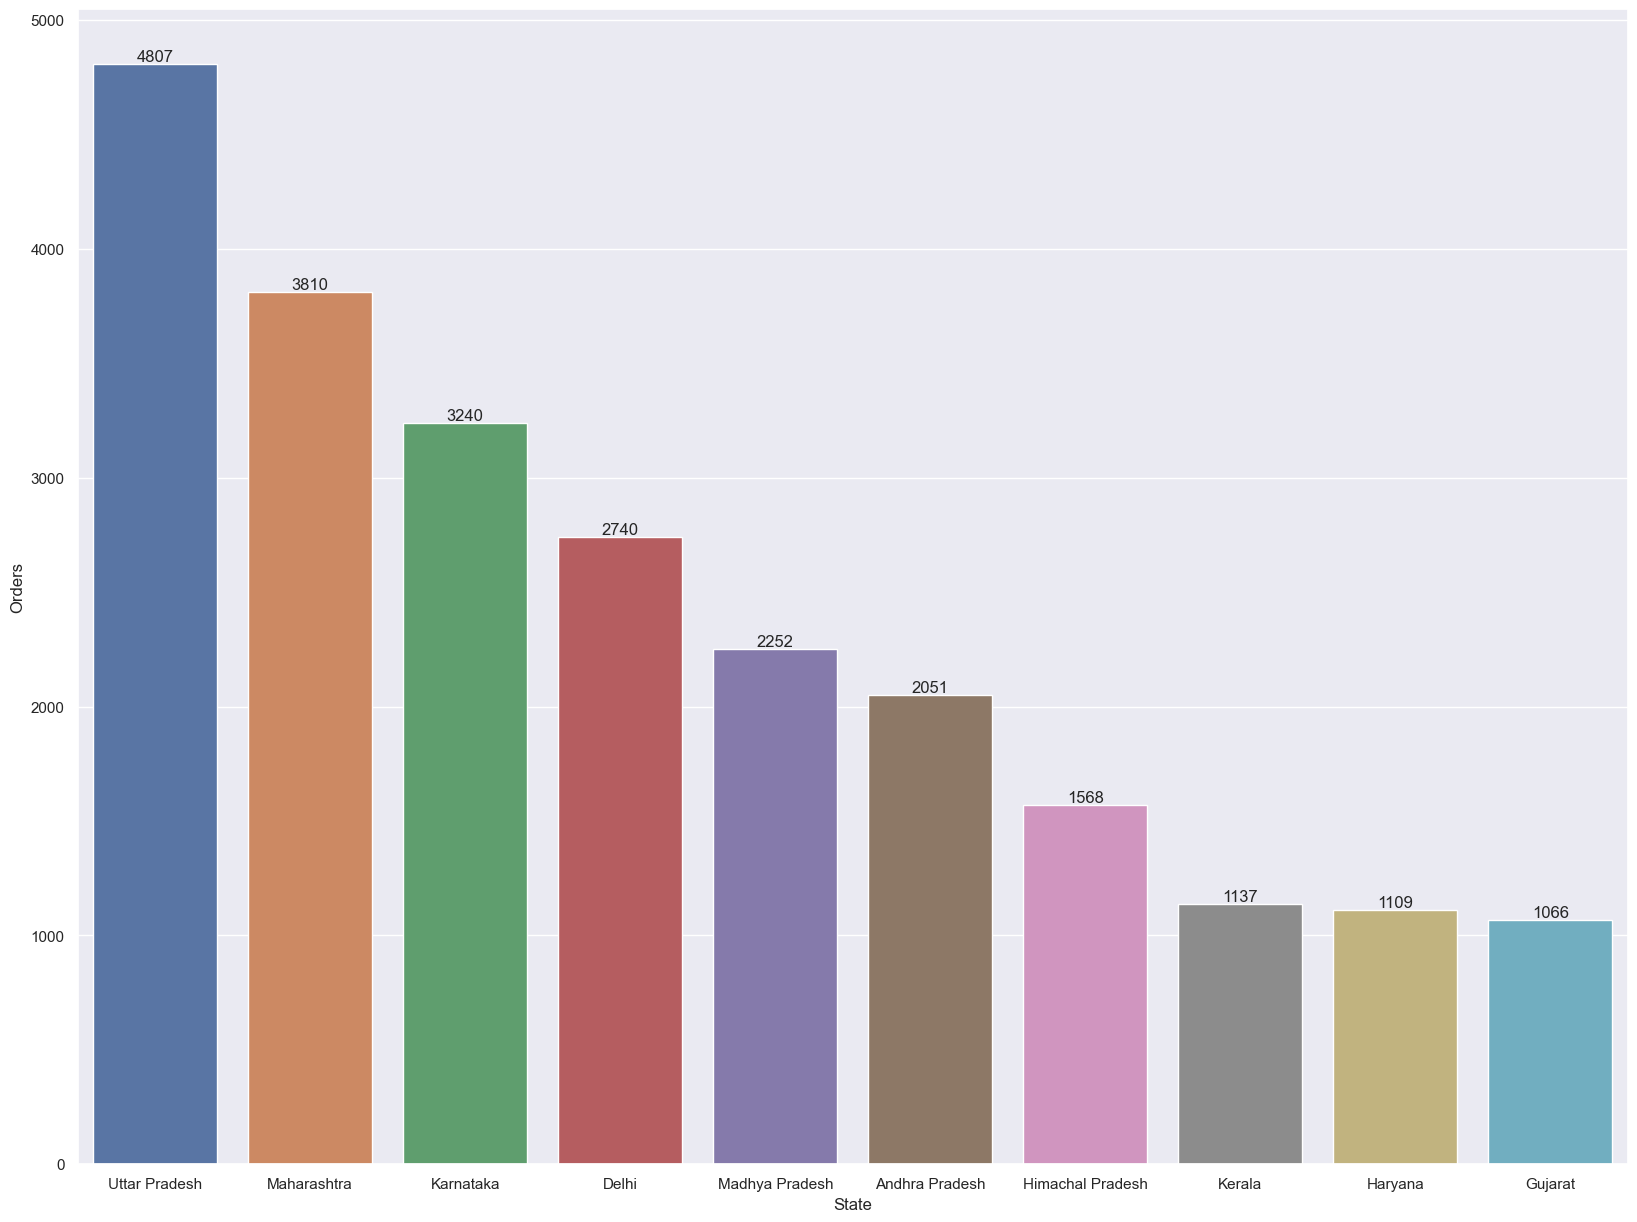

In [150]:
# this will show orders per state analysis
val=df.groupby(by='State', as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10) #Will show top 10 states
bar_plot = sb.barplot(x='State', y='Orders', data=val)
sb.set(rc={'figure.figsize':(20,5)})
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### *As per the graph above its seems that most of the orders are from Uttar Pradesh, Maharashtra and Karnataka*

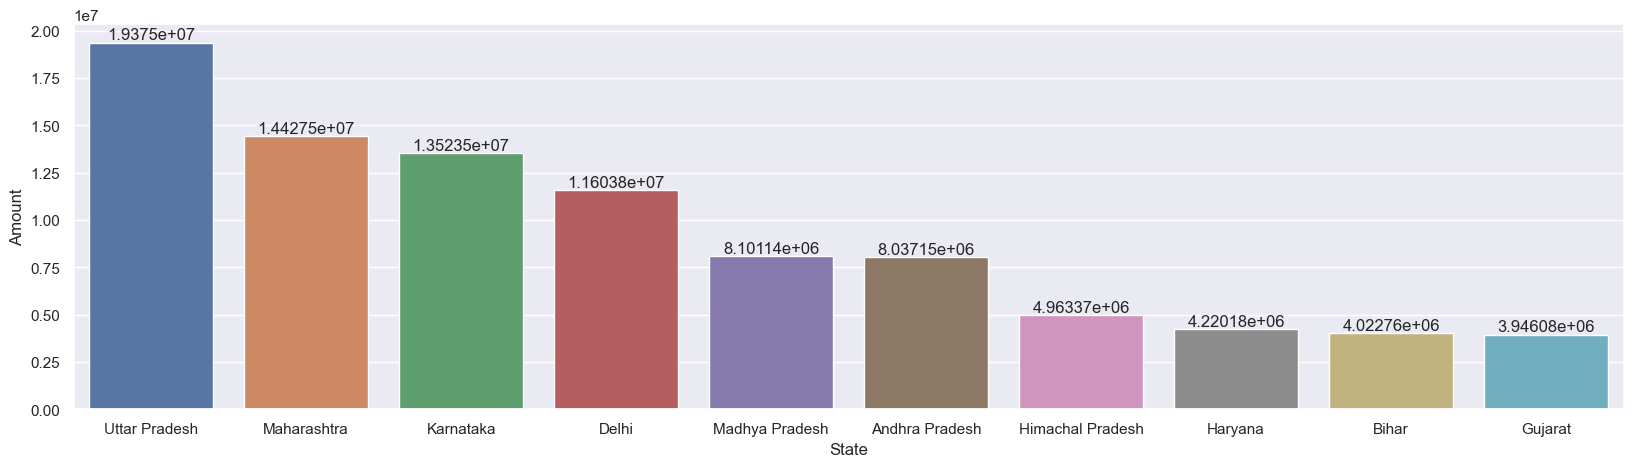

In [151]:
# this will show purchases per state analysis
val=df.groupby(by='State', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10) #Will show top 10 states
bar_plot = sb.barplot(x='State', y='Amount', data=val)
sb.set(rc={'figure.figsize':(20,5)})
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### *As per the graph above its seems that highest purchases done from state Uttar Pradesh, Maharashtra and Karnataka. While Kerala states orders are coming in top 10 shown in previous graph of orders but in purchasing Kerala state is not there in top 10*

#### iv. Analysis on the basis of Marital Status

In [153]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Is_Married', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [160]:
val=df.groupby(by='Is_Married', as_index=False)['Amount'].sum()

In [162]:
val #Since here its shown 0 and 1 which is not convincing. So changing groupby criteria in below step

Is_Married    Amount
0           0  62125384
1           1  44123745

In [163]:
val=df.groupby(by=['Is_Married','Gender'], as_index=False)['Amount'].sum()

In [164]:
val

Is_Married Gender    Amount
0           0      F  43786646
1           0      M  18338738
2           1      F  30549207
3           1      M  13574538

In [165]:
val=df.groupby(by=['Is_Married','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [166]:
val

Is_Married Gender    Amount
0           0      F  43786646
2           1      F  30549207
1           0      M  18338738
3           1      M  13574538

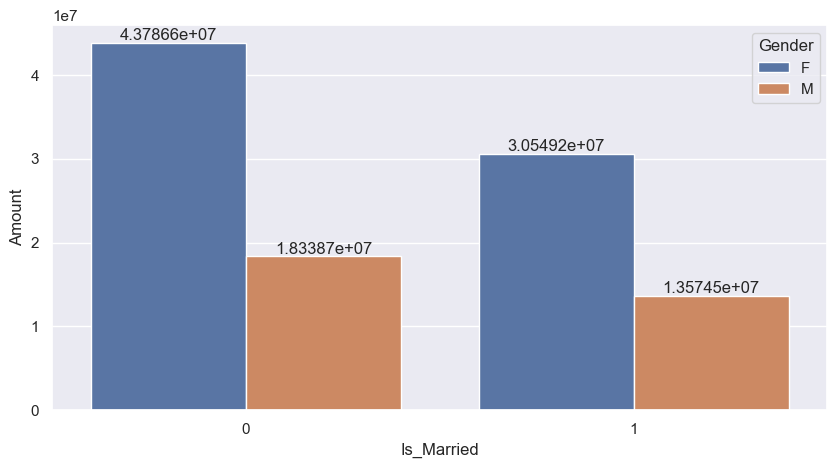

In [170]:
# Purchases from Married and Unmarried male and female
val=df.groupby(by=['Is_Married','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
bar_plot = sb.barplot(x='Is_Married', y='Amount', hue='Gender', data=val)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)
sb.set(rc={'figure.figsize':(5,5)})

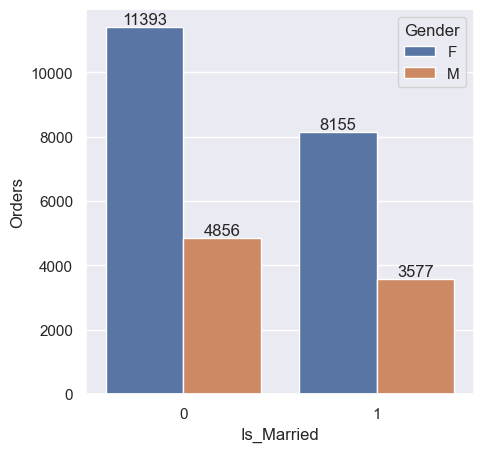

In [171]:
# Orders from Married and Unmarried male and female
val=df.groupby(by=['Is_Married','Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
bar_plot = sb.barplot(x='Is_Married', y='Orders', hue='Gender', data=val)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)
sb.set(rc={'figure.figsize':(5,5)})

##### *As per the above graphs married female done more orders and more purchases. Considering 0 for married and 1 for unmarried*

#### v. Analysis on the basis of Occupation

In [173]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Is_Married', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

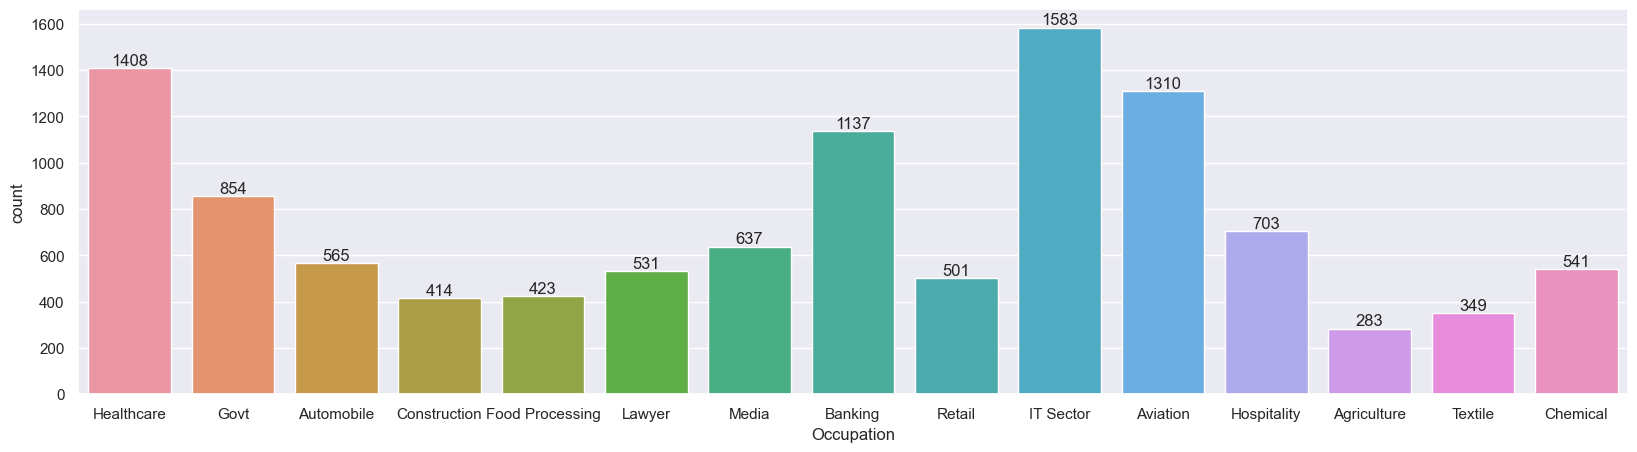

In [178]:
sb.set(rc={'figure.figsize':(20,5)})
cnt_plot = sb.countplot(x='Occupation', data=df)
for bars in cnt_plot.containers:
    cnt_plot.bar_label(bars)

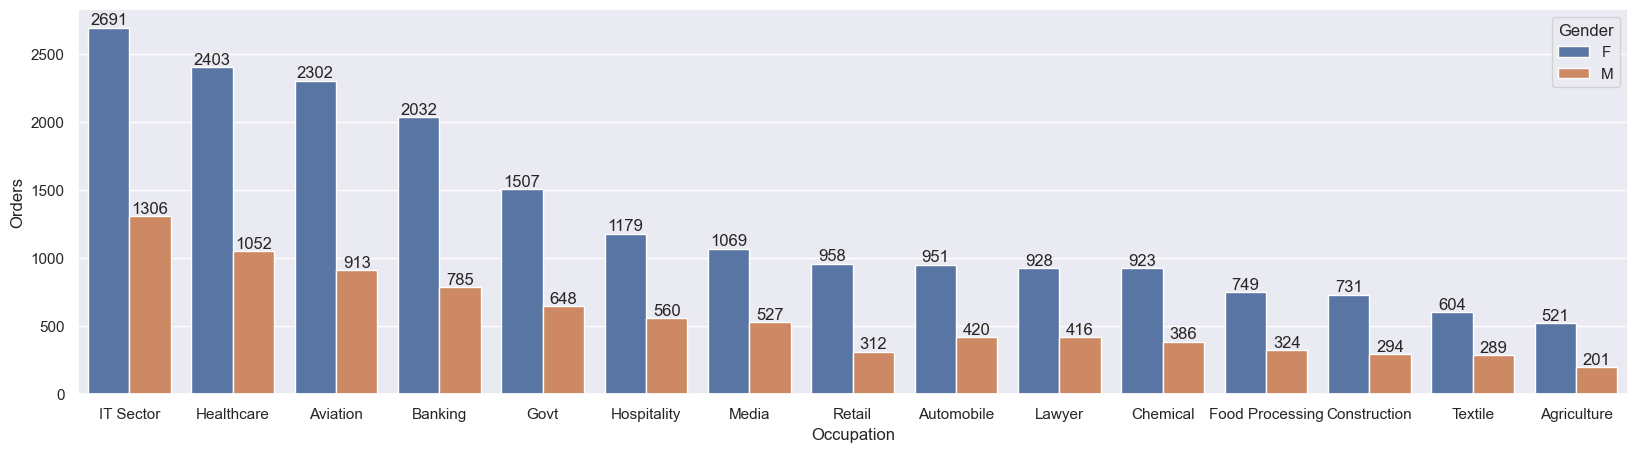

In [179]:
val=df.groupby(by=['Occupation','Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
bar_plot = sb.barplot(x='Occupation', y='Orders', hue='Gender', data=val)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

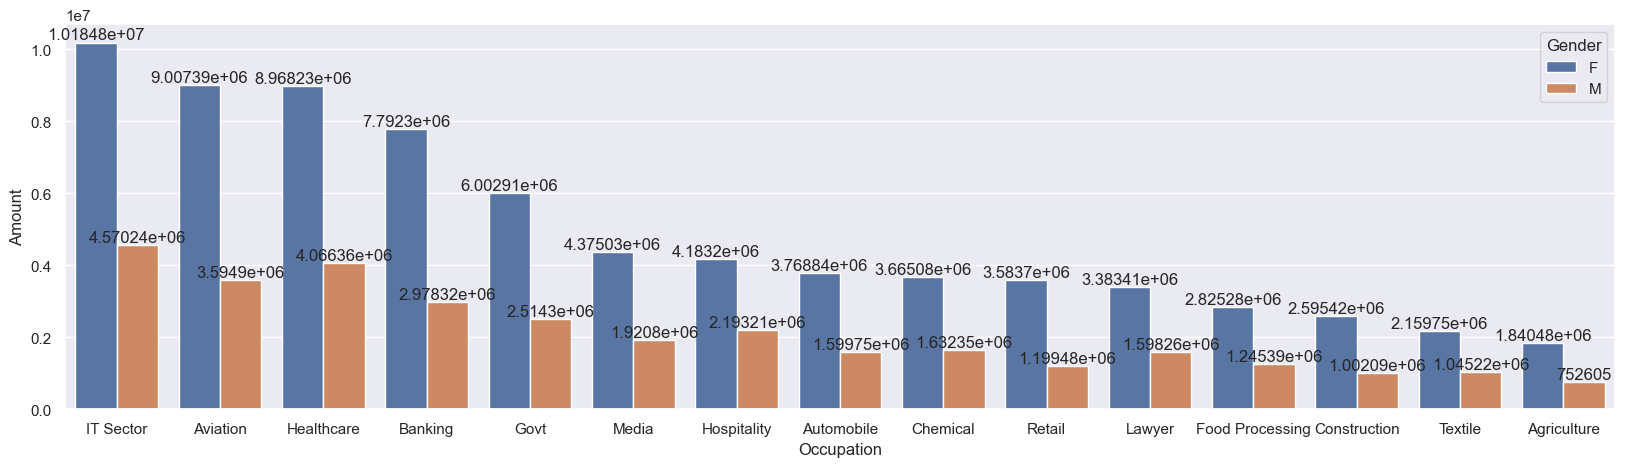

In [180]:
val=df.groupby(by=['Occupation','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
bar_plot = sb.barplot(x='Occupation', y='Amount', hue='Gender', data=val)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### *As per the above graph, its visible that female buyers from IT, healthcare and Aviation sector puts more orders and purchases. However Aviation has more purchases than Healthcare but less orders than Healthcare. But female IT buyers tops in both highest orders and purchases*

#### vi. Analysis on the basis of Product Categories

In [181]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Is_Married', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

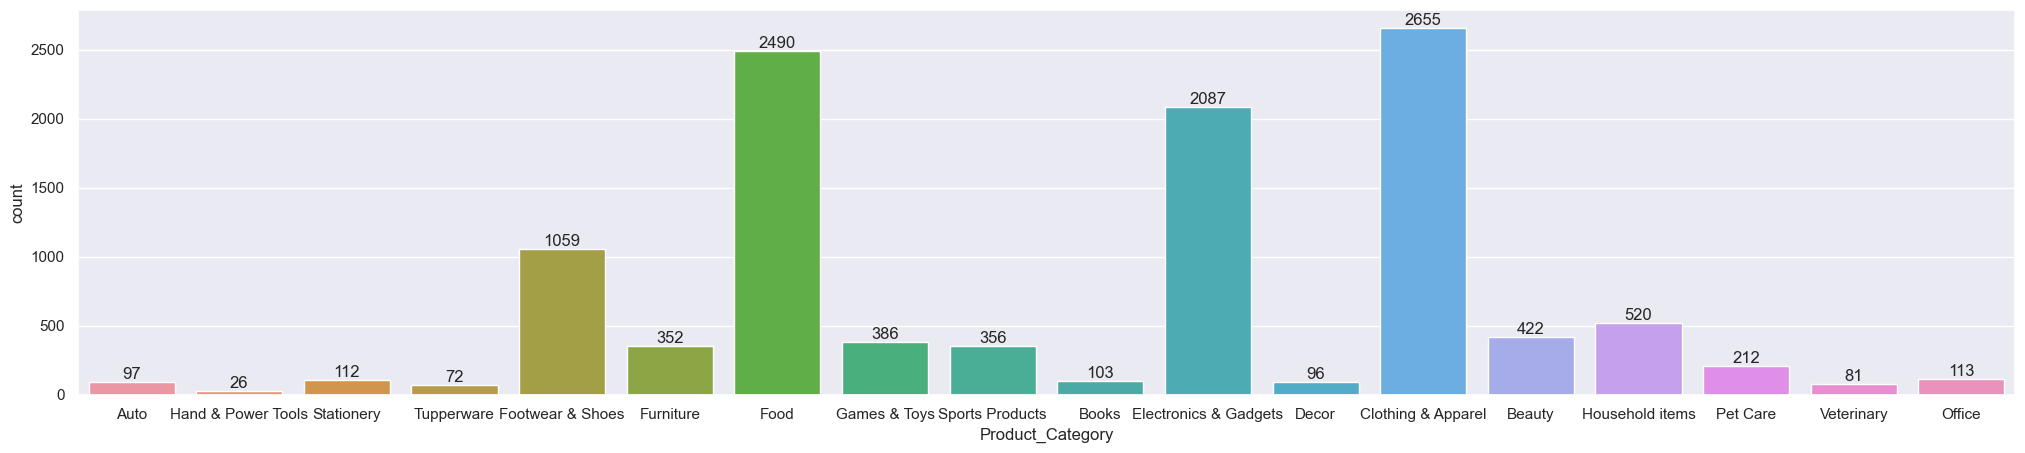

In [183]:
sb.set(rc={'figure.figsize':(25,5)})
cnt_plot = sb.countplot(x='Product_Category', data=df)
for bars in cnt_plot.containers:
    cnt_plot.bar_label(bars)

##### *Most of the buyers are for Clothing, then food and then Electronics*

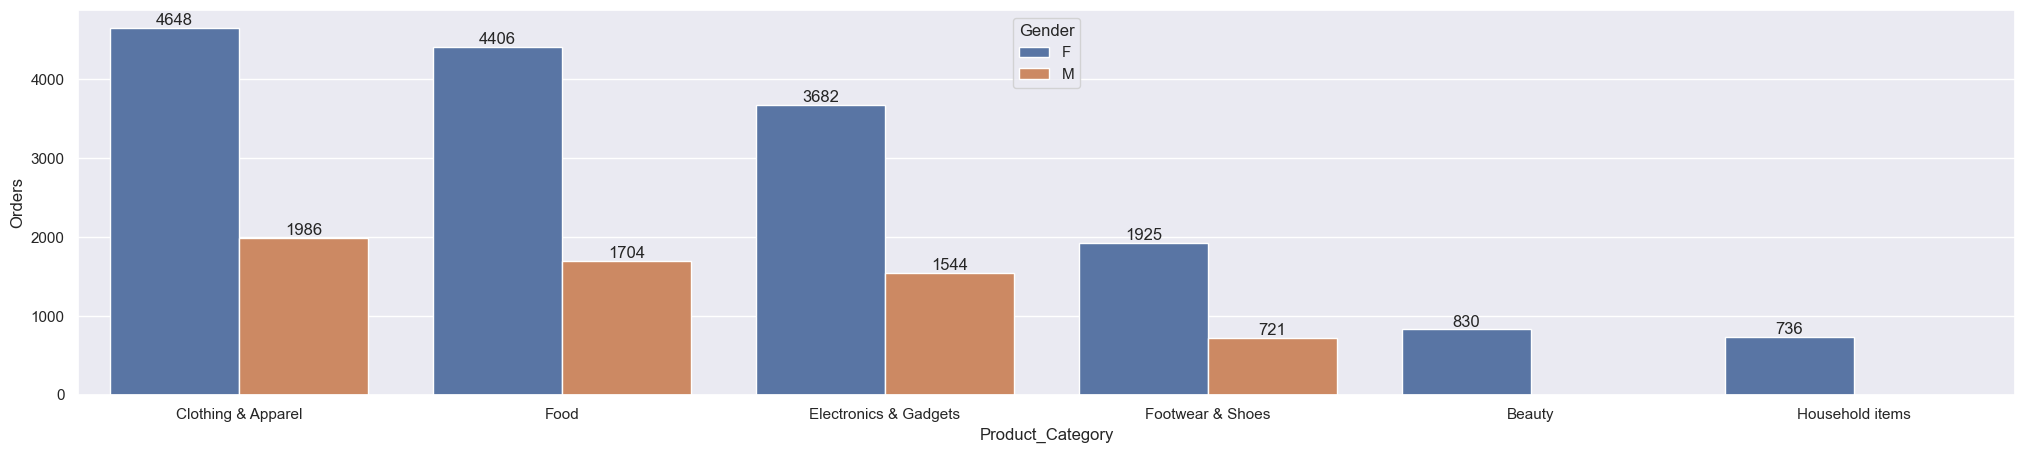

In [184]:
val=df.groupby(by=['Product_Category','Gender'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
bar_plot = sb.barplot(x='Product_Category', y='Orders', hue='Gender', data=val)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

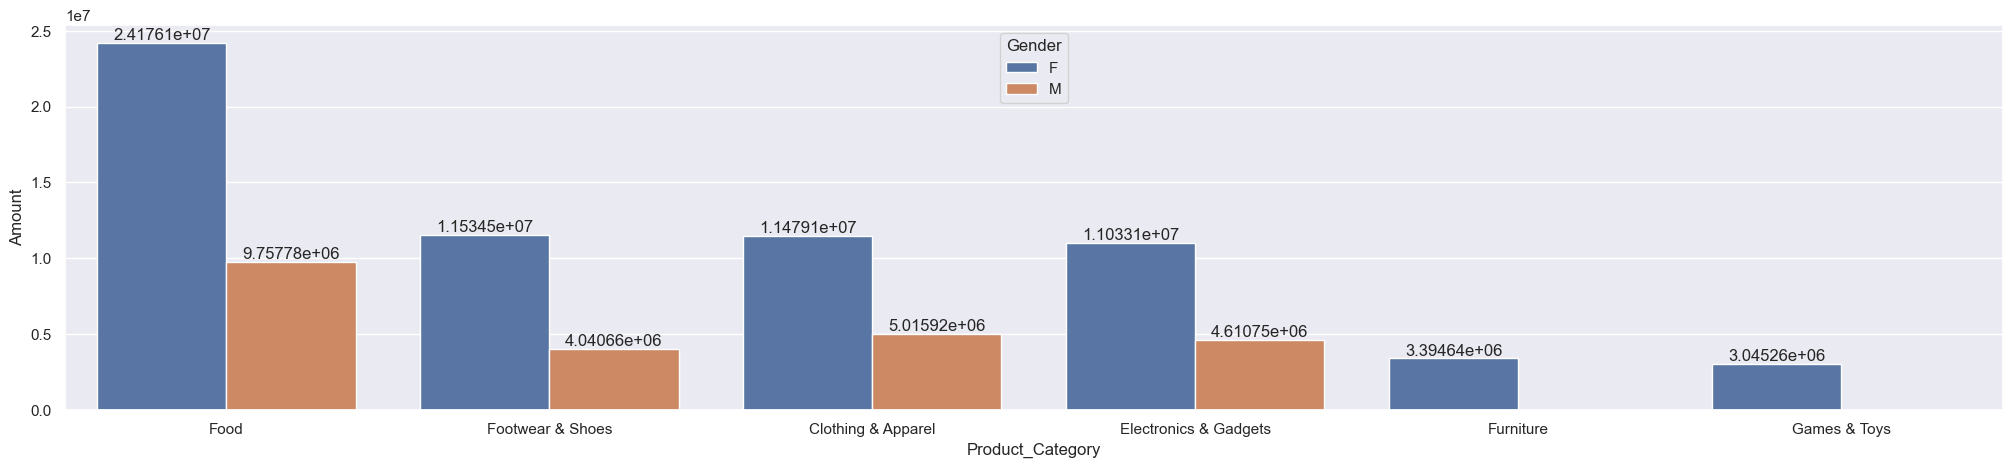

In [185]:
val=df.groupby(by=['Product_Category','Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
bar_plot = sb.barplot(x='Product_Category', y='Amount', hue='Gender', data=val)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### *From the above graphs it seems that Clothing ranks highest in terms of orders, then Food and then Electronics. But in case of purchases, highest money spent on Food then Footwear, Clothing and then for electronics. Highest orders and amount spent is from Female buyers*

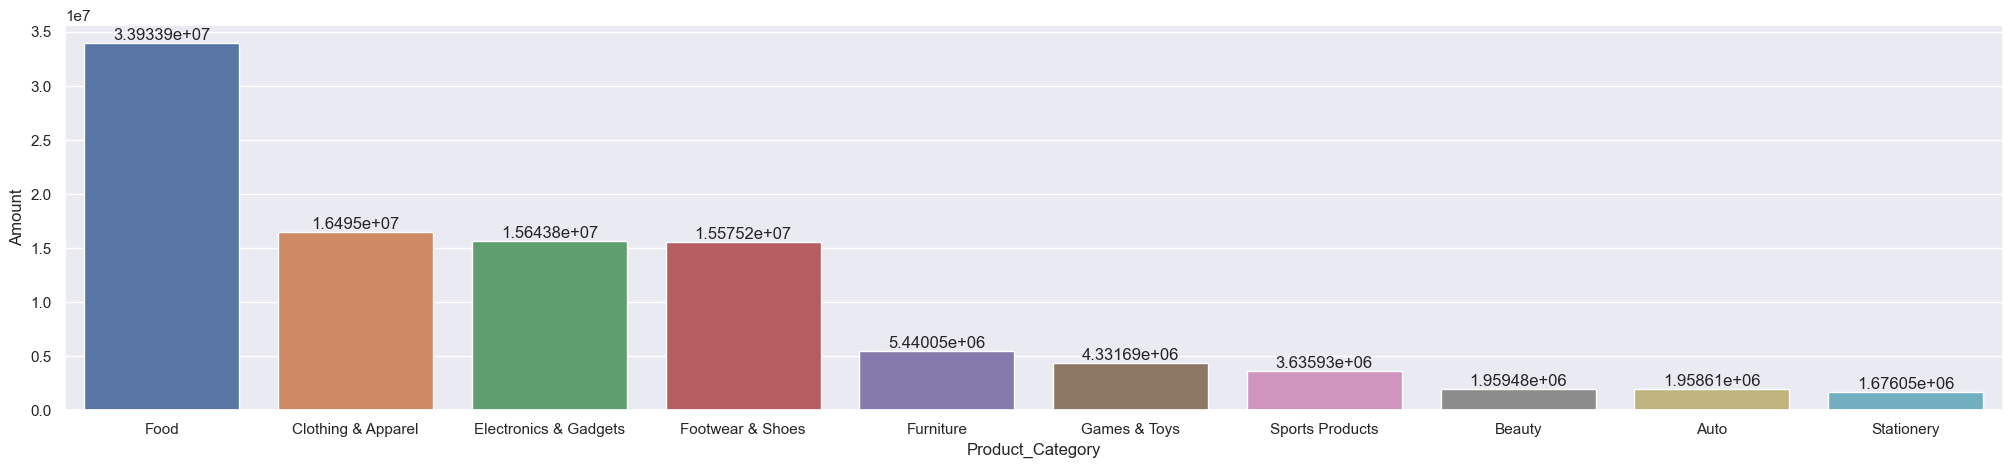

In [186]:
val=df.groupby(by='Product_Category', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
bar_plot = sb.barplot(x='Product_Category', y='Amount', data=val)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

##### *Regardless of Gender if we see highest purchase done for Food, Clothing and Electronics*

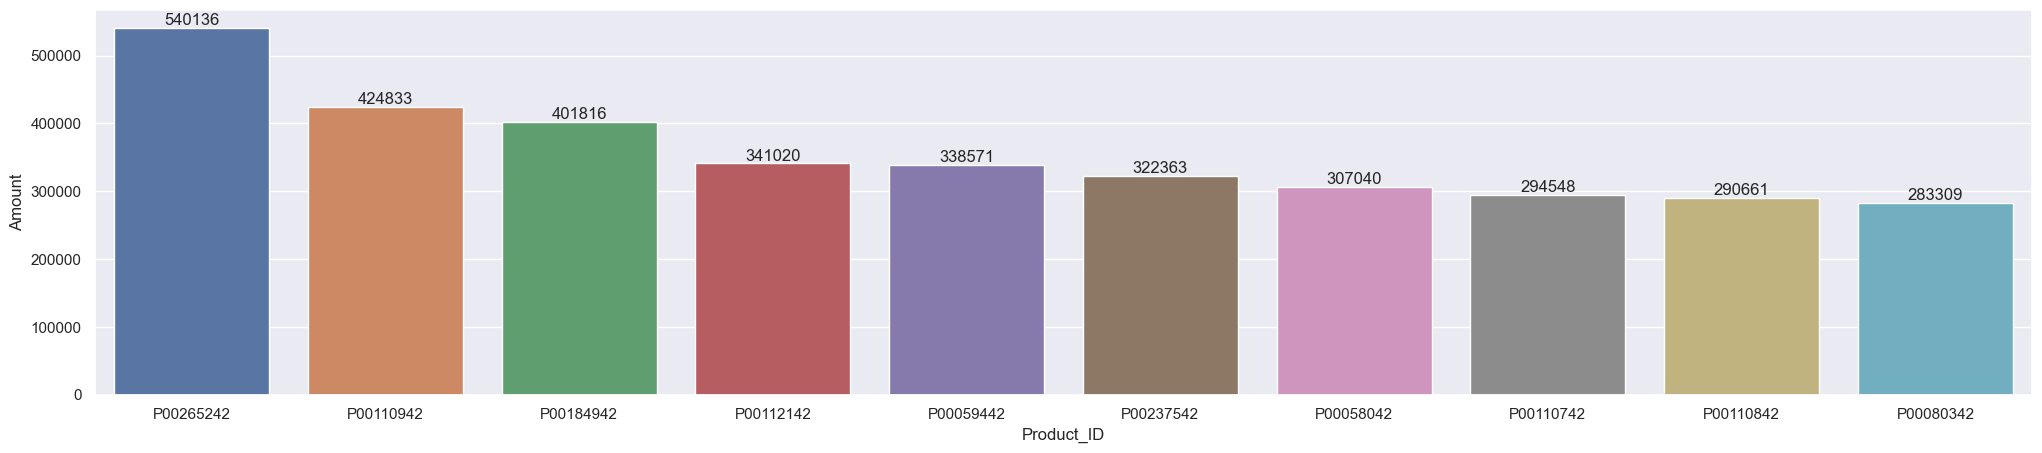

In [187]:
#Highest selling product
val=df.groupby(by='Product_ID', as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
bar_plot = sb.barplot(x='Product_ID', y='Amount', data=val)
for bars in bar_plot.containers:
    bar_plot.bar_label(bars)

<Axes: xlabel='Product_ID'>

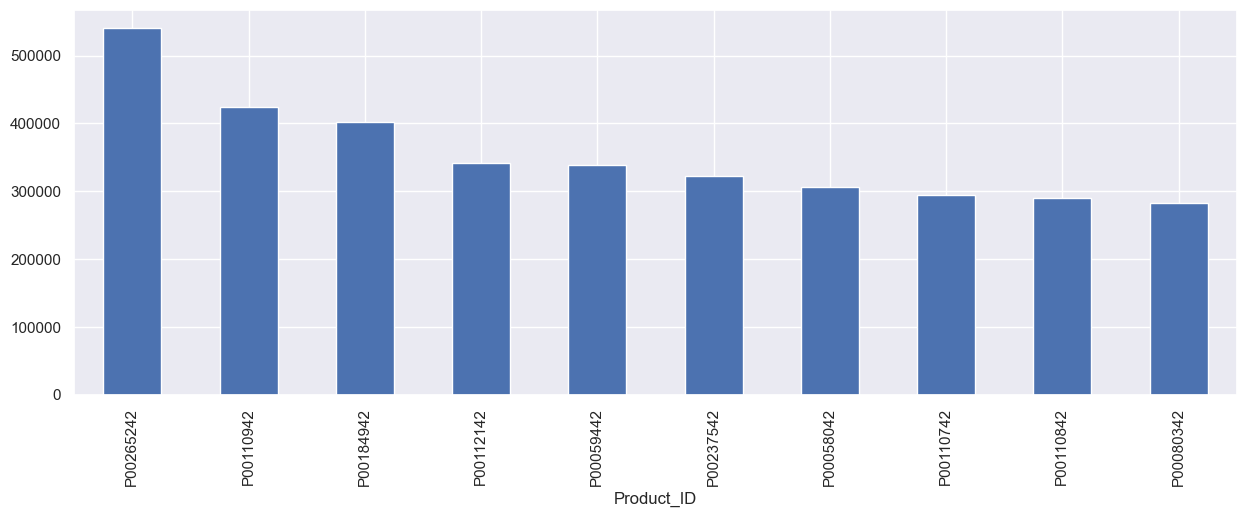

In [194]:
#The above thing can be done using matplotlib
fig1, ax1 = plt.subplots(figsize=(15,5))
df.groupby(by='Product_ID')['Amount'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Product_ID'>

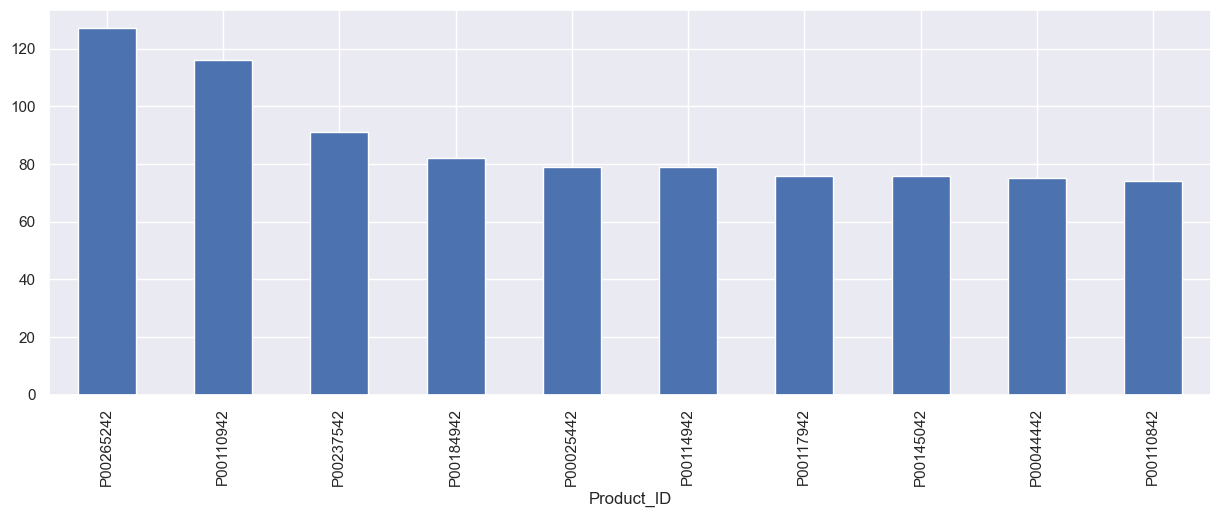

In [195]:
fig1, ax1 = plt.subplots(figsize=(15,5))
df.groupby(by='Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

## Final Conclusion
##### *Married women in age group of 26-35 years from Uttar Pradesh, Maharashtra and Karnataka working in IT, Healthcare and Aviation industry are more likely to buy products from Food, Footwear, Clothing and Electronics category*